# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
import json
import pandas as pd

with open('disease_data.json', 'r') as f:
    data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [2]:
type(data)

dict

In [3]:
data.keys()

dict_keys(['meta', 'data'])

In [4]:
# Checking data types for meta and data
for key in data.keys():
    print(f"{key} datatype: {type(data[key])}")

meta datatype: <class 'dict'>
data datatype: <class 'list'>


We can see that meta is a dictionary and data is a list, now to check meta keys:

In [5]:
data['meta'].keys()

dict_keys(['view'])

In [6]:
type(data['meta']['view'])

dict

In [7]:
print(len(data['meta']['view'].keys()))
data['meta']['view'].keys()

40


dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

We can see that meta has just one key, which is a dictionary data type with 40 keys, one of which is called 'columns'

In [8]:
# A look at what one entry in the data looks like:
print(len(data['data'][0]))
data['data'][0]

42


[1,
 'FF49C41F-CE8D-46C4-9164-653B1227CF6F',
 1,
 1527194521,
 '959778',
 1527194521,
 '959778',
 None,
 '2016',
 '2016',
 'US',
 'United States',
 'BRFSS',
 'Alcohol',
 'Binge drinking prevalence among adults aged >= 18 years',
 None,
 '%',
 'Crude Prevalence',
 '16.9',
 '16.9',
 '*',
 '50 States + DC: US Median',
 '16',
 '18',
 'Overall',
 'Overall',
 None,
 None,
 None,
 None,
 [None, None, None, None, None],
 None,
 '59',
 'ALC',
 'ALC2_2',
 'CRDPREV',
 'OVERALL',
 'OVR',
 None,
 None,
 None,
 None]

There are 42 pieces of information in every data point.

In [9]:
# A closer look at 'view'
data['meta']['view']

{'id': 'g4ie-h725',
 'name': 'U.S. Chronic Disease Indicators (CDI)',
 'attribution': 'Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Division of Population Health',
 'attributionLink': 'http://www.cdc.gov/nccdphp/dph/',
 'averageRating': 0,
 'category': 'Chronic Disease Indicators',
 'createdAt': 1463517008,
 'description': "CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas. In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources.",
 'displayType': 'table',
 'downloadCount': 80068,
 'hideFromCatalog': False,
 'hideFromDataJson': 

We can see that the 'columns' key in 'view' contains a lot of information about each column, including the name and some relevant statistics and value counts.

In [10]:
# Checking the length of 'columns'
len(list(data['meta']['view']['columns']))

42

There are as many entries in 'columns' as there are data points in each data entry, meaning these data entries should line up with the column descriptions contained in 'view'

In [11]:
column_names = [x['name'] for x in data['meta']['view']['columns']]
column_names

['sid',
 'id',
 'position',
 'created_at',
 'created_meta',
 'updated_at',
 'updated_meta',
 'meta',
 'YearStart',
 'YearEnd',
 'LocationAbbr',
 'LocationDesc',
 'DataSource',
 'Topic',
 'Question',
 'Response',
 'DataValueUnit',
 'DataValueType',
 'DataValue',
 'DataValueAlt',
 'DataValueFootnoteSymbol',
 'DatavalueFootnote',
 'LowConfidenceLimit',
 'HighConfidenceLimit',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'StratificationCategory3',
 'Stratification3',
 'GeoLocation',
 'ResponseID',
 'LocationID',
 'TopicID',
 'QuestionID',
 'DataValueTypeID',
 'StratificationCategoryID1',
 'StratificationID1',
 'StratificationCategoryID2',
 'StratificationID2',
 'StratificationCategoryID3',
 'StratificationID3']

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [12]:
df = pd.DataFrame(data['data'])
df.columns = column_names
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [13]:
# Trimming dataset to the topic of Asthma:
df_asthma = df[df['Topic'] == 'Asthma']
print(len(df_asthma))
df_asthma.head()

4675


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
4725,4726,786EA689-97C8-45C7-B733-9CF01D8AEB62,4726,1527194522,959778,1527194522,959778,None,2016,2016,...,17,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5529,5530,AC33E8A2-F507-48D5-B02C-9179EDC425E3,5530,1527194522,959778,1527194522,959778,None,2016,2016,...,18,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5632,5633,1E855D58-2A98-44E2-A062-AE1E8A2F7DB6,5633,1527194522,959778,1527194522,959778,None,2016,2016,...,19,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
6777,6778,D300D76F-6293-4C41-B47F-AB8A93426EE2,6778,1527194522,959778,1527194522,959778,None,2016,2016,...,20,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7034,7035,5868F7F7-82F1-4D72-A144-767DFA87D581,7035,1527194522,959778,1527194522,959778,None,2016,2016,...,21,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None


In [14]:
df_asthma['Question'].head()

4725    Current asthma prevalence among adults aged >=...
5529    Current asthma prevalence among adults aged >=...
5632    Current asthma prevalence among adults aged >=...
6777    Current asthma prevalence among adults aged >=...
7034    Current asthma prevalence among adults aged >=...
Name: Question, dtype: object

In [15]:
# Checking what questions are answered in the dataframe:
df_asthma['Question'].unique()

array(['Current asthma prevalence among adults aged >= 18 years',
       'Asthma prevalence among women aged 18-44 years',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'],
      dtype=object)

Narrow the data down to entries related to Asthma Rates of adults >= 18 yo:

In [19]:
# Trimming the dataset:
df_asthma = df_asthma[df_asthma['Question'] == 'Current asthma prevalence among adults aged >= 18 years']
print(len(df_asthma))
df_asthma[['LocationDesc','DataValue','DataValueUnit']].head()

110


,LocationDesc,DataValue,DataValueUnit
9370,United States,9.3,%
9371,Alabama,9.7,%
9372,Alaska,8.8,%
9373,Arizona,9.4,%
9374,Arkansas,8.5,%


Want to make sure we are comparing only the overall asthma rates:

In [20]:
# Trim data to only that which describes overall asthma rates:
df_asthma = df_asthma[df_asthma['StratificationCategory1'] == 'Overall']
print(len(df_asthma))
df_asthma.head()

110


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9370,9368,DA78CA14-AF4B-49EA-9B9D-5D01C233A286,9368,1527194523,959778,1527194523,959778,None,2016,2016,...,59,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9371,9369,6BEC61D0-E04B-44BA-8170-F7D6A4C40A09,9369,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9372,9370,5D6EDDA9-B241-4498-A262-ED20AB78C44C,9370,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9373,9371,5FCE0D49-11FD-4545-B9E7-14F503123105,9371,1527194523,959778,1527194523,959778,None,2016,2016,...,04,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9374,9372,68F151CE-3084-402C-B672-78A43FBDE287,9372,1527194523,959778,1527194523,959778,None,2016,2016,...,05,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


In [21]:
# Checking data types of relevant columns:
df_asthma[['LocationDesc','DataValue','DataValueUnit']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 9370 to 9479
Data columns (total 3 columns):
LocationDesc     110 non-null object
DataValue        110 non-null object
DataValueUnit    110 non-null object
dtypes: object(3)
memory usage: 3.4+ KB


We can see that the DataValue column is not numeric, converting now:

In [22]:
# Converting Data to Numeric:
df_asthma['DataValue'] = df_asthma['DataValue'].astype('float')

In [25]:
# Check to see how many times each location is listed:
df_asthma['LocationDesc'].value_counts()

Hawaii                  2
Utah                    2
Wisconsin               2
District of Columbia    2
Kentucky                2
Pennsylvania            2
Oregon                  2
Wyoming                 2
Tennessee               2
South Carolina          2
Delaware                2
Oklahoma                2
Arizona                 2
Michigan                2
Mississippi             2
Georgia                 2
Puerto Rico             2
Maryland                2
New Mexico              2
Alaska                  2
Florida                 2
Maine                   2
Connecticut             2
Missouri                2
Iowa                    2
North Carolina          2
Guam                    2
Alabama                 2
New Hampshire           2
South Dakota            2
North Dakota            2
Montana                 2
Virginia                2
Nevada                  2
United States           2
Texas                   2
Washington              2
Rhode Island            2
Idaho       

Each location is listed twice, meaning there are probably duplicate data points

In [29]:
df_asthma[df_asthma['LocationDesc'] == 'Nebraska'][['DataValue','DataValueType']]

,DataValue,DataValueType
9398,8.3,Crude Prevalence
9453,8.2,Age-adjusted Prevalence


It looks like there are two DataValueTypes for each location, we should only use one for comparisons.

In [30]:
# Check value counts:
df_asthma['DataValueType'].value_counts()

Age-adjusted Prevalence    55
Crude Prevalence           55
Name: DataValueType, dtype: int64

In [31]:
# Trimming the dataset to contain only Crude Prevalence Data:
df_asthma = df_asthma[df_asthma['DataValueType'] == 'Crude Prevalence']
print(len(df_asthma))

55


In [32]:
# Sorting values to isolate top 10 rates:
df_asthma_sorted = df_asthma[['LocationDesc','DataValue','DataValueUnit']].sort_values(by=['DataValue'],ascending=False)
df_asthma_sorted_top10 = df_asthma_sorted.head(10)
df_asthma_sorted_top10

,LocationDesc,DataValue,DataValueUnit
9390,Maine,12.2,%
9402,New Mexico,11.8,%
9419,West Virginia,11.8,%
9388,Kentucky,11.6,%
9400,New Hampshire,11.4,%
9413,Tennessee,10.9,%
9393,Michigan,10.9,%
9382,Hawaii,10.7,%
9423,Puerto Rico,10.7,%
9410,Rhode Island,10.7,%


Text(0, 0.5, 'Asthma Rate (%)')

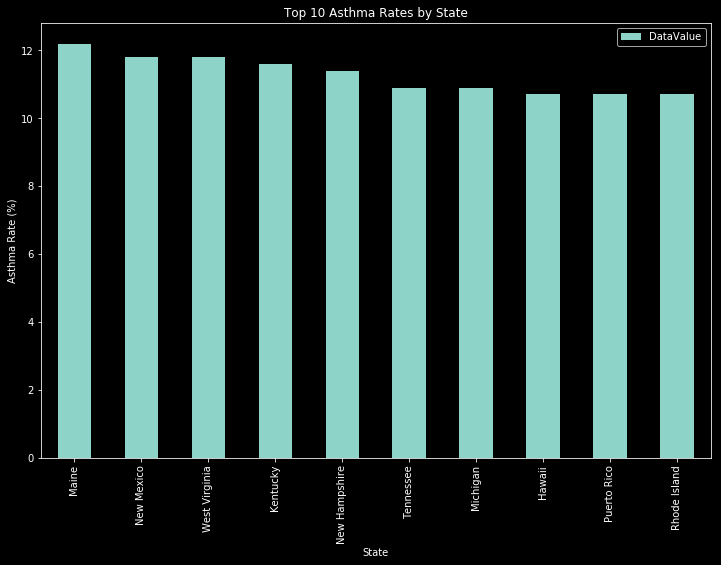

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

ax = df_asthma_sorted_top10.plot.bar(x='LocationDesc', y='DataValue', 
                           title='Top 10 Asthma Rates by State',
                           figsize=(12,8))
ax.set_xlabel('State')
ax.set_ylabel('Asthma Rate (%)')

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!